<a href="https://colab.research.google.com/github/faress-136/ML-Classification/blob/main/MLClassifcation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split , StratifiedKFold  , cross_val_score
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn import ensemble
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder


### File Read

In [ ]:
Headers = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',  'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'Class']
data=pd.read_csv("/content/magic04.data", names = None )
data

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,label
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


Check For Null values (Not to ruin our data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      19020 non-null  float64
 1   x2      19020 non-null  float64
 2   x3      19020 non-null  float64
 3   x4      19020 non-null  float64
 4   x5      19020 non-null  float64
 5   x6      19020 non-null  float64
 6   x7      19020 non-null  float64
 7   x8      19020 non-null  float64
 8   x9      19020 non-null  float64
 9   x10     19020 non-null  float64
 10  label   19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


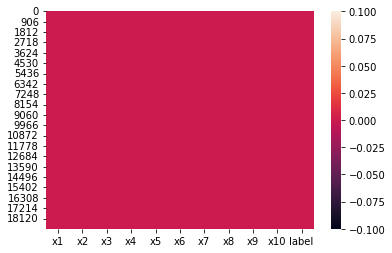

In [ ]:
sb.heatmap(data.isnull())
data.info()     # all coloumns are non-null

# Data  Split 

In [ ]:
x, y = data.iloc[:, :-1], data.iloc[:, [-1]]  # split features and label
x, y = make_imbalance(x, y, sampling_strategy={'g': 6688, 'h': 6688}, random_state=14)
X_train, X_test, y_train, y_test =  train_test_split(x, y,
                                                     test_size=0.3,
                                                      train_size=0.7,
                                                      random_state=17)
# 
# X_train, y_train = ADASYN().fit_resample(X_train,y_train)
# print(X_train.value_counts())
# print(y_train.value_counts())


In [ ]:
print(y_train.value_counts())
print(y_test.value_counts())

label
g        4682
h        4681
dtype: int64
label
h        2007
g        2006
dtype: int64


In [ ]:
y_train = np.ravel(y_train, order='C')

In [ ]:
# def crossValidate(X_train, y_train, classifier):
#     acc_list = [0, 0]
#     X_train = np.array(X_train)
#     y_train = np.array(y_train)
#     print('IN CROSS VALIDATION:\n\n')
#     for fold in range(2, 100):  # Tested in range(2, 100)  and 19 was highest accuracy
#         kf = KFold(n_splits=fold)
#         kf.get_n_splits(X_train)
#         acc = 0
#         counter = 0
#         for train_index, test_index in kf.split(X_train):
#             KFX_train, KFX_test = X_train[train_index], X_train[test_index]
#             KFy_train, KFy_test = y_train[train_index], y_train[test_index]
#             classifier.fit(KFX_train, KFy_train)
#             KFy_predict = classifier.predict(KFX_test)
#             acc += accuracy_score(KFy_test, KFy_predict) * 100
#             counter += 1
#         acc = acc / counter
#         if acc > acc_list[1]:
#             acc_list = [fold, acc]
#     return acc_list

#**Decision** **Tree** 

In [ ]:
DecisionModel = DecisionTreeClassifier(criterion='gini')
model=DecisionModel.fit(X_train, y_train)
y_predict = model.predict(X_test)
model.score(X_test, y_test) 

0.7936705706454025

In [ ]:
CorrectG, WrongG = confusion_matrix(y_test, y_predict)[0]
WrongH, CorrectH = confusion_matrix(y_test, y_predict)[1]
print("Confusion Matrix:\n")
print(f'CorrectG: {CorrectG}\t\tWrongG: {WrongG}\nCorrectH: {CorrectH}\t\tWrongH: {WrongH}\n')
print(f"Accuracy: {accuracy_score(y_test, y_predict) * 100}\n")
print('Report:')
print(f"{classification_report(y_test, y_predict)}\n", )

Confusion Matrix:

CorrectG: 1603		WrongG: 403
CorrectH: 1582		WrongH: 425

Accuracy: 79.36705706454025

Report:
              precision    recall  f1-score   support

           g       0.79      0.80      0.79      2006
           h       0.80      0.79      0.79      2007

    accuracy                           0.79      4013
   macro avg       0.79      0.79      0.79      4013
weighted avg       0.79      0.79      0.79      4013




In [ ]:
DecisionModel = DecisionTreeClassifier(criterion='entropy')
model=DecisionModel.fit(X_train, y_train)
y_predict = model.predict(X_test)
model.score(X_test, y_test) 

0.7936705706454025

In [ ]:
CorrectG, WrongG = confusion_matrix(y_test, y_predict)[0]
WrongH, CorrectH = confusion_matrix(y_test, y_predict)[1]
print("Confusion Matrix:\n")
print(f'CorrectG: {CorrectG}\t\tWrongG: {WrongG}\nCorrectH: {CorrectH}\t\tWrongH: {WrongH}\n')
print(f"Accuracy: {accuracy_score(y_test, y_predict) * 100}\n")
print('Report:')
print(f"{classification_report(y_test, y_predict)}\n", )

Confusion Matrix:

CorrectG: 1592		WrongG: 414
CorrectH: 1593		WrongH: 414

Accuracy: 79.36705706454025

Report:
              precision    recall  f1-score   support

           g       0.79      0.79      0.79      2006
           h       0.79      0.79      0.79      2007

    accuracy                           0.79      4013
   macro avg       0.79      0.79      0.79      4013
weighted avg       0.79      0.79      0.79      4013




# **Naïve Bayes**

In [ ]:
Naive_model = GaussianNB()

In [ ]:
Naive_model.fit(X_train, y_train)
y_predict4 = Naive_model.predict(X_test)
Naive_model.score(X_test, y_test)

0.6508846249688512

In [ ]:
CorrectG, WrongG = confusion_matrix(y_test, y_predict4)[0]
WrongH, CorrectH = confusion_matrix(y_test, y_predict4)[1]
print("Confusion Matrix:\n")
print(f'CorrectG: {CorrectG}\t\tWrongG: {WrongG}\nCorrectH: {CorrectH}\t\tWrongH: {WrongH}\n')
print(f"Accuracy: {accuracy_score(y_test, y_predict4) * 100}\n")
print('Report:')
print(f"{classification_report(y_test, y_predict4)}\n", )

Confusion Matrix:

CorrectG: 1815		WrongG: 191
CorrectH: 797		WrongH: 1210

Accuracy: 65.08846249688513

Report:
              precision    recall  f1-score   support

           g       0.60      0.90      0.72      2006
           h       0.81      0.40      0.53      2007

    accuracy                           0.65      4013
   macro avg       0.70      0.65      0.63      4013
weighted avg       0.70      0.65      0.63      4013




# **AdaBoost**
Model Training

In [ ]:
# hyperParam = [1, 1, 0]
# acc_data = []
# for n in range(1,200):  # Tested in range(1, 200) 
#         clf = AdaBoostClassifier(n_estimators= n, learning_rate=1)
#         acc_list_temp = crossValidate(X_train, y_train, clf)
#         acc_data.append(acc_list_temp[1])
#         if acc_list_temp[1] > hyperParam[2]:
#             hyperParam = [n, acc_list_temp[0], acc_list_temp[1]]
# pyplot.plot(range(5, 205, 5), acc_data)
# pyplot.title('Ada Boost with N Estimators')
# pyplot.xlabel("K")
# pyplot.ylabel("Accuracy")
# pyplot.show()
# print(f'Best k = {hyperParam[0]} with best accuracy = {hyperParam[2]}')

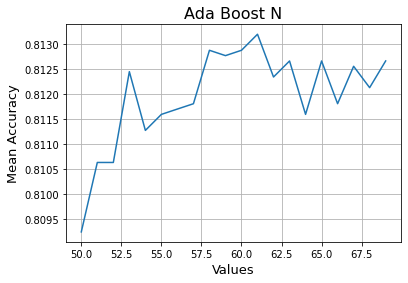

In [ ]:
n_scores = []
skf = StratifiedKFold(n_splits=7)
n_range = range(50, 70) #50
for n in range(50,70):
 clf = AdaBoostClassifier(n_estimators=n)
 scores = cross_val_score(clf, X_train, y_train, cv=skf, scoring='accuracy')
 n_scores.append(scores.mean())

pyplot.title("Ada Boost N", fontsize='16')  
pyplot.plot(n_range, n_scores)  
pyplot.xlabel("Values")  
pyplot.ylabel("Accuracy") 
pyplot.grid()
pyplot.show()


In [ ]:
AdaModel =AdaBoostClassifier(n_estimators = 60)
model = AdaModel.fit(X_train, y_train)
y_predict2 = model.predict(X_test)
model.score(X_test, y_test) 

0.8243209568901072

In [ ]:
CorrectG, WrongG = confusion_matrix(y_test, y_predict2)[0]
WrongH, CorrectH = confusion_matrix(y_test, y_predict2)[1]
print("Confusion Matrix:\n")
print(f'CorrectG: {CorrectG}\t\tWrongG: {WrongG}\nCorrectH: {CorrectH}\t\tWrongH: {WrongH}\n')
print(f"Accuracy: {accuracy_score(y_test, y_predict2) * 100}\n")
print('Report:')
print(f"{classification_report(y_test, y_predict2)}\n", )

Confusion Matrix:

CorrectG: 1619		WrongG: 387
CorrectH: 1638		WrongH: 369

Accuracy: 81.16122601544978

Report:
              precision    recall  f1-score   support

           g       0.81      0.81      0.81      2006
           h       0.81      0.82      0.81      2007

    accuracy                           0.81      4013
   macro avg       0.81      0.81      0.81      4013
weighted avg       0.81      0.81      0.81      4013




# **Random Forest**

In [ ]:
# hyperParam = [1, 1, 0]
# acc_data = []
# for n in range(1,200):  # Tested in range(1, 200)  and 75 was highest accuracy
#         clf = ensemble.RandomForestClassifier(n_estimators= n)
#         acc_list_temp = crossValidate(X_train, y_train, clf)
#         acc_data.append(acc_list_temp[1])
#         if acc_list_temp[1] > hyperParam[2]:
#             hyperParam = [n, acc_list_temp[0], acc_list_temp[1]]
# pyplot.plot(range(5, 205, 5), acc_data)
# pyplot.title('Random Forest with N Estimators')
# pyplot.xlabel("K")
# pyplot.ylabel("Accuracy")
# pyplot.show()
# print(f'Best k = {hyperParam[0]} with best accuracy = {hyperParam[2]}')

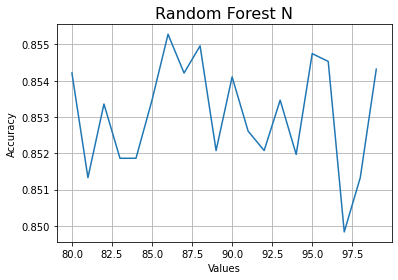

In [ ]:
n_scores = []
skf = StratifiedKFold(n_splits=7)
n_range = range(80, 100)  #64 to 128
for n in range(80,100):
 clf = ensemble.RandomForestClassifier(n_estimators=n)
 scores = cross_val_score(clf, X_train, y_train, cv=skf, scoring='accuracy')
 n_scores.append(scores.mean())

pyplot.title("Random Forest N", fontsize='16') 
pyplot.plot(n_range, n_scores) 
pyplot.xlabel("Values")
pyplot.ylabel("Accuracy")
pyplot.grid() 
pyplot.show()


In [ ]:
Forest_model = ensemble.RandomForestClassifier(n_estimators= 86)
Forest_model.fit(X_train , y_train)
y_predict3 = Forest_model.predict(X_test)
Forest_model.score(X_test, y_test)

0.8679292300024919

In [ ]:
CorrectG, WrongG = confusion_matrix(y_test, y_predict3)[0]
WrongH, CorrectH = confusion_matrix(y_test, y_predict3)[1]
print("Confusion Matrix:\n")
print(f'CorrectG: {CorrectG}\t\tWrongG: {WrongG}\nCorrectH: {CorrectH}\t\tWrongH: {WrongH}\n')
print(f"Accuracy: {accuracy_score(y_test, y_predict3) * 100}\n")
print('Report:')
print(f"{classification_report(y_test, y_predict3)}\n", )

Confusion Matrix:

CorrectG: 1795		WrongG: 211
CorrectH: 1688		WrongH: 319

Accuracy: 86.79292300024919

Report:
              precision    recall  f1-score   support

           g       0.85      0.89      0.87      2006
           h       0.89      0.84      0.86      2007

    accuracy                           0.87      4013
   macro avg       0.87      0.87      0.87      4013
weighted avg       0.87      0.87      0.87      4013




# **K-Nearest Neigbhors**

In [ ]:
# hyperParam = [1, 1, 0]
# acc_data = []
# for k in range(1,200):  # Tested in range(1, 200)  and 7 was highest accuracy
#         clf = KNeighborsClassifier(n_neighbors=k)
#         acc_list_temp = crossValidate(X_train, y_train, clf)
#         acc_data.append(acc_list_temp[1])
#         if acc_list_temp[1] > hyperParam[2]:
#             hyperParam = [k, acc_list_temp[0], acc_list_temp[1]]
# pyplot.plot(range(5, 205, 5), acc_data)
# pyplot.title('KNN with K Tuned')
# pyplot.xlabel("K")
# pyplot.ylabel("Accuracy")
# pyplot.show()
# print(f'Best k = {hyperParam[0]} with best accuracy = {hyperParam[2]}')

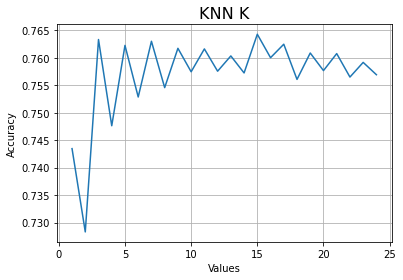

In [ ]:
n_scores = []
skf = StratifiedKFold(n_splits=7)
n_range = range(1, 25)
for n in range(1,25):
 clf = KNeighborsClassifier(n_neighbors=n)
 scores = cross_val_score(clf, X_train, y_train, cv=skf, scoring='accuracy')
 n_scores.append(scores.mean())

pyplot.title("KNN K", fontsize='16') 
pyplot.plot(n_range, n_scores)
pyplot.xlabel("Values") 
pyplot.ylabel("Accuracy")
pyplot.grid()
pyplot.show()


In [ ]:
K_model = KNeighborsClassifier(n_neighbors=15)
K_model.fit(X_train,y_train)
y_predict5 = K_model.predict(X_test)
K_model.score(X_test, y_test)


0.7727385995514577

In [ ]:
CorrectG, WrongG = confusion_matrix(y_test, y_predict5)[0]
WrongH, CorrectH = confusion_matrix(y_test, y_predict5)[1]
print("Confusion Matrix:\n")
print(f'CorrectG: {CorrectG}\t\tWrongG: {WrongG}\nCorrectH: {CorrectH}\t\tWrongH: {WrongH}\n')
print(f"Accuracy: {accuracy_score(y_test, y_predict5) * 100}\n")
print('Report:')
print(f"{classification_report(y_test, y_predict5)}\n", )

Confusion Matrix:

CorrectG: 1731		WrongG: 275
CorrectH: 1370		WrongH: 637

Accuracy: 77.27385995514578

Report:
              precision    recall  f1-score   support

           g       0.73      0.86      0.79      2006
           h       0.83      0.68      0.75      2007

    accuracy                           0.77      4013
   macro avg       0.78      0.77      0.77      4013
weighted avg       0.78      0.77      0.77      4013




# **Neural Network**

In [ ]:
X_train.shape

(9363, 10)

In [ ]:
label_encoder = LabelEncoder()
Ytrain_encoded = label_encoder.fit_transform(y_train)
Ytest_encoded = label_encoder.fit_transform(y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
model = Sequential()
model.add(Dense(500, activation='relu', input_dim=10))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_encoded,epochs=5, batch_size=5, verbose=1)
# _ , accuracy = model.evaluate(X_train, y_train, verbose=0)

# print('Accuracy: %.2f' % (accuracy*100))
y_predict6 = model.predict(X_test)
# score = model.evaluate(X_test, y_test,verbose=1)
# print(score)




Epoch 1/5
1873/1873 [==============================] - 4s 2ms/step - loss: 0.6040 - accuracy: 0.7158
Epoch 2/5
1873/1873 [==============================] - 4s 2ms/step - loss: 0.4966 - accuracy: 0.7529
Epoch 3/5
1873/1873 [==============================] - 4s 2ms/step - loss: 0.4754 - accuracy: 0.7680
Epoch 4/5
1873/1873 [==============================] - 4s 2ms/step - loss: 0.4623 - accuracy: 0.7764
Epoch 5/5
1873/1873 [==============================] - 4s 2ms/step - loss: 0.4541 - accuracy: 0.7788


In [ ]:
Ypredict=[]
for y in y_predict6:
  if y<0.5:
    y=0
  else:
    y=1
  Ypredict.append(y)  
CorrectG, WrongG = confusion_matrix(Ytest_encoded, Ypredict)[0]
WrongH, CorrectH = confusion_matrix(Ytest_encoded, Ypredict)[1]
print("Confusion Matrix:\n")
print(f'CorrectG: {CorrectG}\t\tWrongG: {WrongG}\nCorrectH: {CorrectH}\t\tWrongH: {WrongH}\n')
print(f"Accuracy: {accuracy_score(Ytest_encoded, Ypredict) * 100}\n")
print('Report:')
print(f"{classification_report(Ytest_encoded, Ypredict)}\n", )

Confusion Matrix:

CorrectG: 1973		WrongG: 33
CorrectH: 934		WrongH: 1073

Accuracy: 72.43957139297284

Report:
              precision    recall  f1-score   support

           0       0.65      0.98      0.78      2006
           1       0.97      0.47      0.63      2007

    accuracy                           0.72      4013
   macro avg       0.81      0.72      0.70      4013
weighted avg       0.81      0.72      0.70      4013


